<a href="https://colab.research.google.com/github/ceying/DataSparsityProject_CreditStability/blob/main/HomeCreditStability_Optuna2_Hyperparam_Feb2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
#from category_encoders import HashingEncoder

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
#from catboost import CatBoostClassifier

from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, balanced_accuracy_score


from sklearn.calibration import calibration_curve
from sklearn.tree import plot_tree

np.random.seed(0)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

In [ ]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#Load Data

In [ ]:
df_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/df_train.csv')
df_raw.head()

<ipython-input-8-229bff99e930>:1: DtypeWarning: Columns (256,257,258,259,260,261,272,289,294,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,326,327,328,329,336,339,340,341,344,345) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/df_train.csv')


,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,...,max_sex_738L,max_type_25L,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L
0,0,0,0,1,4,30000.0,0.0,0.0,0.0,0.0,...,F,PRIMARY_MOBILE,NaN,NaN,NaN,COLLEAGUE,PE,NaN,NaN,PHONE
1,1,0,0,1,4,19999.8,0.0,0.0,0.0,0.0,...,M,PRIMARY_MOBILE,NaN,NaN,NaN,OTHER_RELATIVE,PE,NaN,NaN,PHONE
2,2,0,0,1,5,78000.0,0.0,0.0,0.0,0.0,...,F,PRIMARY_MOBILE,NaN,NaN,NaN,SPOUSE,PE,NaN,NaN,PHONE
3,3,0,0,1,4,40000.0,0.0,1.0,0.0,2.0,...,F,PRIMARY_MOBILE,NaN,NaN,NaN,SPOUSE,PE,NaN,NaN,PHONE
4,4,0,1,1,5,44000.0,0.0,1.0,0.0,0.0,...,F,PRIMARY_MOBILE,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE


In [ ]:
df = df_raw.copy()

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 347 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    case_id                               int64  
 1    WEEK_NUM                              int64  
 2    target                                int64  
 3    month_decision                        int64  
 4    weekday_decision                      int64  
 5    credamount_770A                       float64
 6    applicationcnt_361L                   float64
 7    applications30d_658L                  float64
 8    applicationscnt_1086L                 float64
 9    applicationscnt_464L                  float64
 10   applicationscnt_867L                  float64
 11   clientscnt_1022L                      float64
 12   clientscnt_100L                       float64
 13   clientscnt_1071L                      float64
 14   clientscnt_1130L                      float64
 1

## Completeness level

In [ ]:
df['completeness'] = (1 - df.isnull().sum(axis=1) / len(df.columns)) * 100


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='completeness', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Completeness')

Text(0.5, 0, 'Completeness (%)')

Text(0, 0.5, 'Frequency')

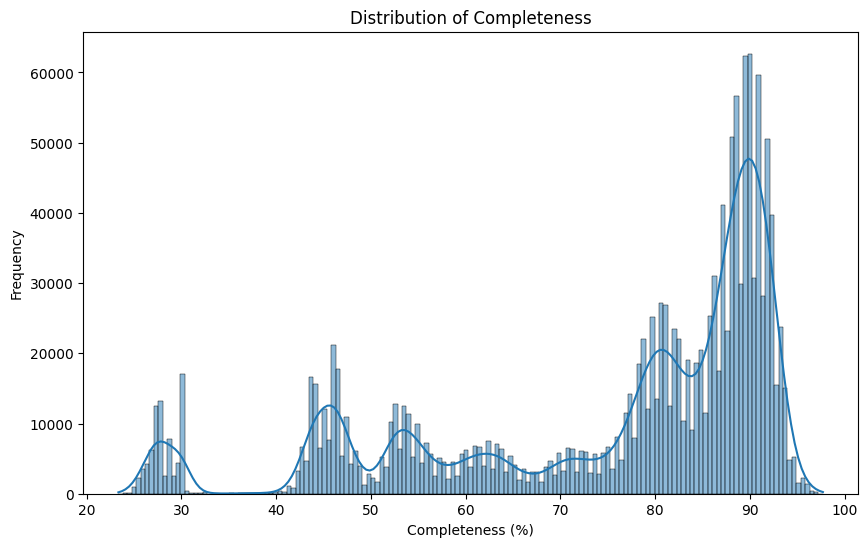

In [ ]:
# prompt: show distribution of df['completeness'] in a graph

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already defined as in your previous code
plt.figure(figsize=(10, 6))
sns.histplot(df['completeness'], kde=True)
plt.title('Distribution of Completeness')
plt.xlabel('Completeness (%)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df['completeness'].describe()

,completeness
count,1.526659e+06
mean,7.523836e+01
std,1.866177e+01
min,2.356322e+01
25%,6.235632e+01
50%,8.304598e+01
75%,8.936782e+01
max,9.770115e+01


In [ ]:
percentage_less_than_30 = (df[df['completeness'] < 30].shape[0] / df.shape[0]) * 100

print(f"Percentage of rows with completeness less than 30%: {percentage_less_than_30:.2f}%")


Percentage of rows with completeness less than 30%: 3.95%


In [ ]:
percentage_less_than_40 = (df[df['completeness'] < 40].shape[0] / df.shape[0]) * 100

print(f"Percentage of rows with completeness less than 40%: {percentage_less_than_40:.2f}%")


Percentage of rows with completeness less than 40%: 5.18%


In [ ]:
percentage_less_than_50 = (df[df['completeness'] < 50].shape[0] / df.shape[0]) * 100

print(f"Percentage of rows with completeness less than 50%: {percentage_less_than_50:.2f}%")

Percentage of rows with completeness less than 50%: 14.85%


In [ ]:
percentage_more_than_80 = (df[df['completeness'] > 80].shape[0] / df.shape[0]) * 100

print(f"Percentage of rows with completeness more than 80%: {percentage_more_than_80:.2f}%")

Percentage of rows with completeness more than 80%: 58.54%


In [ ]:
percentage_40_70 = (df[(df['completeness'] >= 40) & (df['completeness'] <= 70)].shape[0] / df.shape[0]) * 100

print(f"Percentage of rows with completeness between 40% and 70%: {percentage_40_70:.2f}%")


Percentage of rows with completeness between 40% and 70%: 24.09%


In [ ]:
percentage_40_80 = (df[(df['completeness'] >= 40) & (df['completeness'] <= 80)].shape[0] / df.shape[0]) * 100

print(f"Percentage of rows with completeness between 40% and 80%: {percentage_40_80:.2f}%")

Percentage of rows with completeness between 40% and 80%: 36.27%


In [ ]:
# prompt: create a new categorical column for completeness level: low for completeness < 40, mid for completeness between 40 and 80, high for completeness over 80

# Create the new categorical column 'completeness_level'
df['completeness_level'] = pd.cut(df['completeness'], bins=[0, 40, 80, 100], labels=['low', 'mid', 'high'], right=False)

# Display the first few rows to verify the new column
print(df[['completeness', 'completeness_level']].head())


   completeness completeness_level
0     27.953890                low
1     27.953890                low
2     42.939481                mid
3     43.227666                mid
4     41.498559                mid


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Target Variable per Completeness Level')

Text(0.5, 0, 'Completeness Level')

Text(0, 0.5, 'Count')

Text(0, 5, '77074.0')

Text(0, 5, '536990.0')

Text(0, 5, '864601.0')

Text(0, 5, '2083.0')

Text(0, 5, '16746.0')

Text(0, 5, '29165.0')

Text(0, 5, '0')

Text(0, 5, '0')

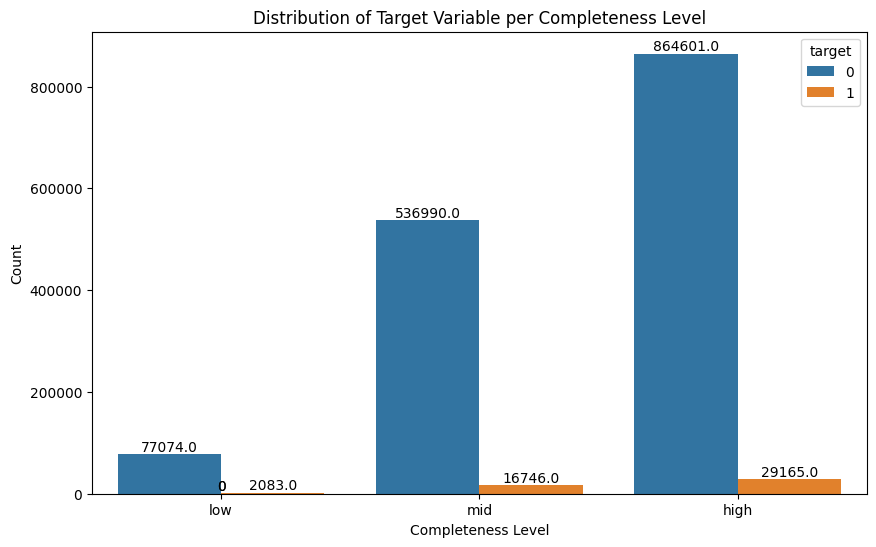

In [ ]:
# prompt: plot distribution of 'target' per completeness_level, show count on top of each bar

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already defined and contains 'target' and 'completeness_level' columns
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='completeness_level', hue='target', data=df)
plt.title('Distribution of Target Variable per Completeness Level')
plt.xlabel('Completeness Level')
plt.ylabel('Count')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
# prompt: group by completeness level, show count of target = 0,   target  = 1, and % of target = 1

# Assuming 'df' is already defined and contains 'target' and 'completeness_level' columns
completeness_summary = df.groupby('completeness_level')['target'].agg(['value_counts'])
completeness_summary = completeness_summary.unstack()
completeness_summary.columns = completeness_summary.columns.droplevel(0)
completeness_summary['%_target_0'] = (completeness_summary[0] / (completeness_summary[0] + completeness_summary[1])) * 100
completeness_summary['%_target_1'] = (completeness_summary[1] / (completeness_summary[0] + completeness_summary[1])) * 100
completeness_summary


<ipython-input-14-b5a660268458>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completeness_summary = df.groupby('completeness_level')['target'].agg(['value_counts'])


target,0,1,%_target_0,%_target_1
completeness_level,,,,
low,77074,2083,97.368521,2.631479
mid,536990,16746,96.975815,3.024185
high,864601,29165,96.736842,3.263158


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = df[df['completeness_level'] == 'low']
df_mid = df[df['completeness_level'] == 'mid']
df_high = df[df['completeness_level'] == 'high']


In [ ]:
# Separate target variable
weeks = df["WEEK_NUM"]
case_id = df["case_id"]

X = df.drop(columns=["target", "case_id", "WEEK_NUM","completeness"], axis=1)
y = df['target']


# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.value_counts()

,count
target,
0,1478665
1,47994


## hyperparam tuning - sub_df
stratified sample

In [ ]:
sub_df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.01, random_state=42))
sub_df


<ipython-input-158-a9ea19477b86>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.01, random_state=42))


,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1059657,1653686,47,0,11,5,44296.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,EM,NaN,NaN,PHONE,83.861671,high
1131980,1726009,52,0,12,2,28096.0,0.0,0.0,0.0,0.0,...,False,False,EMPLOYED,NaN,CL,True,M,PRIMARY_MOBILE,91.354467,high
351856,736389,26,0,7,1,22198.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,75.792507,mid
642802,1027343,91,0,10,1,17516.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,SPOUSE,PE,NaN,NaN,PHONE,52.161383,mid
71575,117009,10,0,3,6,20604.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,89.337176,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686186,1280215,6,1,2,2,10198.0,0.0,0.0,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,M,PRIMARY_MOBILE,81.556196,high
1093122,1687151,49,1,12,7,38100.0,0.0,0.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,M,PRIMARY_MOBILE,80.403458,high
1170675,1764704,55,1,1,1,15958.0,0.0,0.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,86.167147,high
354739,739272,27,1,7,4,30728.0,0.0,0.0,0.0,190.0,...,NaN,NaN,NaN,NaN,CL,NaN,NaN,PRIMARY_MOBILE,61.095101,mid


In [ ]:
X = sub_df.drop(columns=["target", "case_id", "WEEK_NUM","completeness","completeness_level"], axis=1)
y = sub_df['target']

In [ ]:
y.value_counts()

,count
target,
0,14787
1,480


In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparam tuning - sub_df2
with downsample majority class + stratified sample 1% + keep completeness level same

In [ ]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample

# Assuming df is your original DataFrame
sub_df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

# Calculate the class weights for the target variable
class_weights = compute_class_weight(class_weight='balanced', classes=df['target'].unique(), y=df['target'])

# Get the majority and minority class labels
majority_class = sub_df['target'].value_counts().index[0]
minority_class = sub_df['target'].value_counts().index[1]

# Split the data into majority and minority classes
majority_df = sub_df[sub_df['target'] == majority_class]
minority_df = sub_df[sub_df['target'] == minority_class]

# Downsample the majority class
downsampled_majority_df = resample(majority_df,
                                      replace=False,
                                      n_samples=len(minority_df),
                                      random_state=42,
                                      stratify=majority_df['completeness_level'])

# Combine the downsampled majority class with the minority class
balanced_df = pd.concat([downsampled_majority_df, minority_df])



<ipython-input-10-51f2f3fabdc9>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


In [ ]:
sub_df['target'].value_counts()

,count
target,
0,147866
1,4799


In [ ]:
class_weights

array([ 0.51622883, 15.904686  ])

In [ ]:
balanced_df['target'].value_counts()
balanced_df['completeness_level'].value_counts()

,count
target,
0,4799
1,4799


,count
completeness_level,
high,5704
mid,3430
low,464


In [ ]:
# prompt: export balanced_df

# Export the balanced_df DataFrame to a CSV file
balanced_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/balanced_df.csv', index=False)


In [ ]:
X = balanced_df.drop(columns=["target", "case_id", "WEEK_NUM","completeness"], axis=1)
y = balanced_df['target']


In [ ]:
y.value_counts()

,count
target,
0,4799
1,4799


In [ ]:
X['completeness_level'].value_counts()

,count
completeness_level,
high,5704
mid,3430
low,464


## Downsampling majority class

In [ ]:
from sklearn.utils import resample


# Group data by 'completeness_level'
grouped = df.groupby('completeness_level')

# Initialize an empty list to store the downsampled DataFrames
downsampled_dfs = []

# Iterate over each group
for name, group in grouped:
    # Separate target variable
    majority_class = group['target'].value_counts().index[0]
    minority_class = group['target'].value_counts().index[1]
    majority_df = group[group['target'] == majority_class]
    minority_df = group[group['target'] == minority_class]

    # Downsample the majority class within the current group
    downsampled_majority_df = resample(majority_df,
                                          replace=False,
                                          n_samples=len(minority_df),
                                          random_state=42)
    # Combine the downsampled majority class with the minority class
    balanced_group = pd.concat([downsampled_majority_df, minority_df])

    downsampled_dfs.append(balanced_group)

# Concatenate all the downsampled groups back into a single DataFrame
full_balanced_df = pd.concat(downsampled_dfs)




<ipython-input-56-0803c7c00e02>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('completeness_level')


In [ ]:
full_balanced_df['target'].value_counts()
full_balanced_df['completeness_level'].value_counts()

,count
target,
0,47994
1,47994


,count
completeness_level,
high,58330
mid,33492
low,4166


In [ ]:
full_balanced_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/full_balanced_df.csv', index=False)


In [ ]:
X = full_balanced_df.drop(columns=["target", "case_id", "WEEK_NUM","completeness"], axis=1)
y = full_balanced_df['target']


In [ ]:
y.value_counts()

,count
target,
0,47994
1,47994


In [ ]:
X['completeness_level'].value_counts()

,count
completeness_level,
high,58330
mid,33492
low,4166


## Preprocessing

In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++
## NEW ##
#++++++++++++++++++++++++++++++++++++++++++++++++++++
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders import TargetEncoder

# Define preprocessing steps for numerical and categorical variables
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
date_features = X.select_dtypes(include=['datetime64[ns]']).columns

# Create a pipeline for categorical features with imputation and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('target', TargetEncoder())
])

# Create a pipeline for numerical features with imputation
class MissingIndicatorTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        missing_indicator = X.isnull().astype(int)
        return pd.concat([X, missing_indicator], axis=1)

numerical_transformer = Pipeline(steps=[
    ('missing_indicator', MissingIndicatorTransformer())
])

# Define the ColumnTransformer to apply transformations to different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Fit the preprocessor to the entire training dataset
preprocessor.fit(X, y)

# Transform the training and validation datasets
X_preprocessed = preprocessor.transform(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('missing_indicator',
                                                  MissingIndicatorTransformer())]),
                                 Index(['month_decision', 'weekday_decision', 'credamount_770A',
       'applicationcnt_361L', 'applications30d_658L', 'applicationscnt_1086L',
       'applicationscnt_464L', 'applicationscnt_867L', 'clientscnt_1022L',
       'clientscnt_100L',
       ...
       'max_numberofoutstandinst...
       'max_incometype_1044T', 'max_relationshiptoclient_415T',
       'max_relationshiptoclient_642T', 'max_remitter_829L', 'max_role_1084L',
       'max_safeguarantyflag_411L', 'max_sex_738L', 'max_type_25L',
       'last_contaddr_matchlist_1032L', 'last_contaddr_smempladdr_334L',
       'last_incometype_1044T', 'last_relationshiptoclient_642T',
       'last_role_1084L', 'last_safeguarantyflag_411L', 'last_sex_738L',
       'last_type_25L'],
      dtype='object'))])

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
X_preprocessed

array([[3.00000000e+00, 4.00000000e+00, 4.79378000e+04, ...,
        5.15971494e-01, 5.15971494e-01, 5.24211483e-01],
       [7.00000000e+00, 3.00000000e+00, 1.79740000e+04, ...,
        4.97187365e-01, 4.49022155e-01, 4.85678993e-01],
       [2.00000000e+00, 2.00000000e+00, 8.45760000e+04, ...,
        5.15971494e-01, 5.15971494e-01, 5.24211483e-01],
       ...,
       [1.00000000e+01, 6.00000000e+00, 6.18140000e+04, ...,
        4.83564296e-01, 4.49022155e-01, 4.85678993e-01],
       [1.00000000e+01, 1.00000000e+00, 1.20000000e+05, ...,
        4.83564296e-01, 4.49022155e-01, 4.85678993e-01],
       [1.00000000e+01, 1.00000000e+00, 2.00000000e+05, ...,
        4.83564296e-01, 4.49022155e-01, 4.85678993e-01]])

In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [ ]:
X_preprocessed = pd.DataFrame(X_preprocessed, index=X.index)
X_train4_index, X_test4_index, y_train4_index, y_test4_index = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [ ]:
X_preprocessed.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Full_balanced_df_X_preprocessed.csv', index=False)

In [ ]:
train_index = X_train4_index.index
test_index = X_test4_index.index

In [ ]:
train_index

Index([1114579, 1047390,  116655, 1388284,  614365, 1304335, 1048293, 1103595,
        792125, 1106510,
       ...
        452192, 1338195, 1209425, 1383200, 1071969,  453305,  932847,  906158,
        281931,  674366],
      dtype='int64', length=76790)

#Model Setup

### Decision Tree Setup

In [ ]:
def optimize_trial(trial, X, y):
    model_name = 'Decision Tree'

    # Define the Decision Tree classifier
    model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }

    # Set the hyperparameters
    model.set_params(**params)

    # Define the cross-validation strategy
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store the metrics
    f1_scores = []
    precision_scores = []
    recall_scores = []
    roc_auc_scores = []
    accuracy_scores = []
    balanced_accuracy_scores = []

    # Perform cross-validation
    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]

        # Use iloc to access y using the integer positions
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Define the model with the hyperparameters
        model = DecisionTreeClassifier(**params, random_state=42)

        # Fit the model on the preprocessed training data
        model.fit(X_train, y_train)

        # Predict on the preprocessed validation data
        y_pred_proba = model.predict_proba(X_val)[:, 1]

        # Convert predicted probabilities to class labels (0 and 1)
        y_pred_class = (y_pred_proba >= 0.5).astype(int)  # Convert to 0 and 1

        # Calculate the metrics
        f1 = f1_score(y_val, y_pred_class)
        precision = precision_score(y_val, y_pred_class, zero_division=0)
        recall = recall_score(y_val, y_pred_class)
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        accuracy = accuracy_score(y_val, y_pred_class)
        balanced_accuracy = balanced_accuracy_score(y_val, y_pred_class)

        # Append the metrics to the lists
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        roc_auc_scores.append(roc_auc)
        accuracy_scores.append(accuracy)
        balanced_accuracy_scores.append(balanced_accuracy)

    # Calculate the average metrics
    avg_f1 = np.mean(f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_roc_auc = np.mean(roc_auc_scores)
    avg_accuracy = np.mean(accuracy_scores)
    avg_balanced_accuracy = np.mean(balanced_accuracy_scores)

    # Set the user attributes
    trial.set_user_attr('metrics', {
        'f1': avg_f1,
        'precision': avg_precision,
        'recall': avg_recall,
        'roc_auc': avg_roc_auc,
        'accuracy': avg_accuracy,
        'balanced_accuracy': avg_balanced_accuracy
    })

    # Return the average F1-score as the objective value
    return avg_f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_trial(trial, X_train, y_train), n_trials=50)

[I 2025-02-13 21:51:57,477] A new study created in memory with name: no-name-94f97b91-5e99-450f-88b1-b523114ff21d
[I 2025-02-13 21:52:01,371] Trial 0 finished with value: 0.6516033770822977 and parameters: {'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6516033770822977.
[I 2025-02-13 21:52:05,697] Trial 1 finished with value: 0.6445940816462994 and parameters: {'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6516033770822977.
[I 2025-02-13 21:52:09,331] Trial 2 finished with value: 0.658353743411496 and parameters: {'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.658353743411496.
[I 2025-02-13 21:52:10,618] Trial 3 finished with value: 0.6102693508723029 and parameters: {'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.658353743411496.
[I 2025-02-13 21:52:14,836] Trial 4 finished with value: 0.639831966

In [ ]:
best_trial = study.best_trial
print('Best parameters:', best_trial.params)
print('Best metrics:', best_trial.user_attrs)

Best parameters: {'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 3}
Best metrics: {'metrics': {'f1': 0.658353743411496, 'precision': 0.6845735747212502, 'recall': 0.6350460004166583, 'roc_auc': 0.7066628237840585, 'accuracy': 0.6687921586590662, 'balanced_accuracy': 0.6689627907842454}}


In [ ]:
DT_results = []

for trial in study.trials:
    metrics = trial.user_attrs['metrics']
    params = trial.params
    DT_results.append({
        'Trial': trial.number,
        'F1-score': metrics['f1'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'ROC-AUC': metrics['roc_auc'],
        'Accuracy': metrics['accuracy'],
        'balanced_accuracy': metrics['balanced_accuracy'],
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        'min_samples_leaf': params['min_samples_leaf']
    })



In [ ]:
df_metrics_DT = pd.DataFrame(DT_results)
df_metrics_DT

,Trial,F1-score,Precision,Recall,ROC-AUC,Accuracy,balanced_accuracy,max_depth,min_samples_split,min_samples_leaf
0,0,0.651603,0.669945,0.634785,0.690655,0.658894,0.659015,8,8,2
1,1,0.644594,0.662067,0.628820,0.676135,0.651992,0.652106,9,2,2
2,2,0.658354,0.684574,0.635046,0.706663,0.668792,0.668963,7,9,3
3,3,0.610269,0.654585,0.578024,0.651063,0.632192,0.632467,2,10,5
4,4,0.639832,0.668492,0.614567,0.700942,0.653032,0.653226,9,5,9
5,5,0.651150,0.677339,0.627531,0.709160,0.662411,0.662588,8,3,9
6,6,0.621226,0.688103,0.568418,0.705387,0.653291,0.653712,4,8,9
7,7,0.610269,0.654585,0.578024,0.651063,0.632192,0.632467,2,9,7
8,8,0.652773,0.685843,0.623899,0.715010,0.667230,0.667447,6,5,2
9,9,0.610269,0.654585,0.578024,0.651063,0.632192,0.632467,2,9,6


In [ ]:
df_metrics_DT.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/df_metrics_DT.csv', index=False)


In [ ]:
import joblib
joblib.dump(study, '/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/optuna_DT_study.pkl')

['/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/optuna_DT_study.pkl']

#### Fit with best params on 1% sample data

In [ ]:
best_params = study.best_params
best_model = DecisionTreeClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=9,
                       random_state=42)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=9,
                       random_state=42)

In [ ]:
result_balanced_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)
result_balanced_df


,y_test,y_pred_proba
1376824,0,0.820144
962499,1,0.834928
865020,1,0.933333
1204906,1,0.845000
129163,1,0.509091
...,...,...
780085,1,0.820144
748332,0,0.671233
568890,1,0.369620
1366744,1,0.582090


In [ ]:
result_balanced_df = result_balanced_df.merge(balanced_df, left_index=True, right_index=True, how='left')
result_balanced_df


,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1376824,0,0.820144,2553579,11,0,3,2,150000.000,0.0,0.0,...,False,False,OTHER,NaN,CL,True,M,PRIMARY_MOBILE,87.031700,high
962499,1,0.834928,1556528,38,1,9,6,29596.000,0.0,1.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,93.083573,high
865020,1,0.933333,1459049,29,1,7,2,38758.000,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,89.913545,high
1204906,1,0.845000,1798935,60,1,2,3,56996.000,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,90.778098,high
129163,1,0.509091,174597,44,1,11,7,150000.000,0.0,0.0,...,NaN,NaN,NaN,CHILD,PE,NaN,NaN,PHONE,91.354467,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780085,1,0.820144,1374114,20,1,5,3,46942.402,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,83.285303,high
748332,0,0.671233,1342361,15,0,4,2,13376.000,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,84.149856,high
568890,1,0.369620,953423,57,1,2,5,11400.000,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,71.757925,mid
1366744,1,0.582090,2543499,6,1,2,6,22000.000,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,80.691643,high


In [ ]:
result_balanced_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/DT_result_balanced_df.csv', index=False)


##### with completeness level

In [ ]:
result_balanced_df['completeness_level'].value_counts()

,count
completeness_level,
high,1119
mid,713
low,88


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_balanced_df[result_balanced_df['completeness_level'] == 'low']
df_mid = result_balanced_df[result_balanced_df['completeness_level'] == 'mid']
df_high = result_balanced_df[result_balanced_df['completeness_level'] == 'high']

In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_balanced_df['target'], result_balanced_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.676186
1,Precision,0.650000
2,Recall,0.704570
3,ROC AUC,0.712293
4,Accuracy,0.669271
5,Balanced Accuracy,0.669956


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.597701,0.669377,0.686620
Precision,0.481481,0.656915,0.661017
Recall,0.787879,0.682320,0.714286
ROC AUC,0.644904,0.703487,0.724043
Accuracy,0.602273,0.657784,0.681859
Balanced Accuracy,0.639394,0.657400,0.682623


#### Fit with best params on full df

In [ ]:
import joblib
study = joblib.load('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/optuna_DT_study.pkl')

In [ ]:
best_params = study.best_params
best_model = DecisionTreeClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=9,
                       random_state=42)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=9,
                       random_state=42)

In [ ]:
result_full_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)

result_full_df


,y_test,y_pred_proba
1322328,0,0.009872
597755,0,0.045209
1325416,0,0.015804
877847,0,0.036678
210557,0,0.024594
...,...,...
1078208,0,0.024594
37805,0,0.036678
1160004,0,0.041106
828383,0,0.024594


In [ ]:
result_full_df = result_full_df.merge(df, left_index=True, right_index=True, how='left')
result_full_df


,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1322328,0,0.009872,1916357,87,0,9,4,76986.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,85.878963,high
597755,0,0.045209,982288,71,0,5,3,21000.0,0.0,0.0,...,NaN,NaN,NaN,OTHER_RELATIVE,PE,NaN,NaN,PHONE,71.469741,mid
1325416,0,0.015804,1919445,87,0,9,6,26900.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,M,PRIMARY_MOBILE,90.201729,high
877847,0,0.036678,1471876,30,0,8,5,36580.0,0.0,0.0,...,False,False,EMPLOYED,NaN,CL,True,F,PRIMARY_MOBILE,89.337176,high
210557,0,0.024594,255991,90,0,9,2,70000.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,91.066282,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078208,0,0.024594,1672237,48,0,12,6,76360.0,0.0,0.0,...,NaN,NaN,NaN,NaN,EM,NaN,NaN,PHONE,90.201729,high
37805,0,0.036678,37805,45,0,11,5,200000.0,0.0,4.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,69.452450,mid
1160004,0,0.041106,1754033,54,0,1,6,84372.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,90.201729,high
828383,0,0.024594,1422412,25,0,6,5,11998.0,0.0,0.0,...,False,False,SELFEMPLOYED,NaN,CL,True,F,PRIMARY_MOBILE,90.778098,high


In [ ]:
result_full_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/DT_result_full_df.csv', index=False)


##### with completeness level

In [ ]:
result_full_df['completeness_level'].value_counts()

,count
completeness_level,
high,179306
mid,110360
low,15666


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_full_df[result_full_df['completeness_level'] == 'low']
df_mid = result_full_df[result_full_df['completeness_level'] == 'mid']
df_high = result_full_df[result_full_df['completeness_level'] == 'high']


In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_full_df['target'], result_full_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.002497
1,Precision,0.203390
2,Recall,0.001256
3,ROC AUC,0.745060
4,Accuracy,0.968598
5,Balanced Accuracy,0.500549


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.000000,0.002434,0.002706
Precision,0.000000,0.307692,0.173913
Recall,0.000000,0.001222,0.001364
ROC AUC,0.638966,0.733235,0.758052
Accuracy,0.973701,0.970288,0.967112
Balanced Accuracy,0.500000,0.500569,0.500572


#### Fit with best params on full_balanced_df

In [ ]:
import joblib
study = joblib.load('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/optuna_DT_study.pkl')

In [ ]:
best_params = study.best_params
best_model = DecisionTreeClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=9,
                       random_state=42)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=9,
                       random_state=42)

In [ ]:
result_full_bal_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)

result_full_bal_df


,y_test,y_pred_proba
1440621,0,0.728296
58053,1,0.577353
81368,1,0.468514
397645,0,0.238095
242521,1,0.376356
...,...,...
1520211,0,0.190476
379134,0,0.577353
636297,1,0.728807
846126,1,0.709016


In [ ]:
result_full_bal_df  = result_full_bal_df.merge(df, left_index=True, right_index=True, how='left')
result_full_bal_df


,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1440621,0,0.728296,2617376,35,0,9,5,62000.0,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,93.371758,high
58053,1,0.577353,103487,0,1,1,5,40000.0,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,57.925072,mid
81368,1,0.468514,126802,17,1,5,6,64000.0,0.0,0.0,...,NaN,NaN,NaN,CHILD,PE,NaN,NaN,PHONE,84.726225,high
397645,0,0.238095,782178,34,0,8,2,16738.0,0.0,0.0,...,NaN,NaN,NaN,NaN,CL,NaN,NaN,PRIMARY_MOBILE,71.181556,mid
242521,1,0.376356,627054,5,1,2,3,4100.0,0.0,1.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,59.654179,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520211,0,0.190476,2696966,87,0,9,6,15000.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,87.319885,high
379134,0,0.577353,763667,31,0,8,3,23998.0,0.0,0.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,29.971182,low
636297,1,0.728807,1020830,89,1,9,3,47998.0,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,53.314121,mid
846126,1,0.709016,1440155,27,1,7,3,31343.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,90.489914,high


In [ ]:
result_full_bal_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/DT_result_full_bal_df.csv', index=False)


##### with completeness level

In [ ]:
result_full_bal_df['completeness_level'].value_counts()

,count
completeness_level,
high,11662
mid,6711
low,825


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_full_bal_df[result_full_bal_df['completeness_level'] == 'low']
df_mid = result_full_bal_df[result_full_bal_df['completeness_level'] == 'mid']
df_high = result_full_bal_df[result_full_bal_df['completeness_level'] == 'high']


In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_full_bal_df['target'], result_full_bal_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.697429
1,Precision,0.692135
2,Recall,0.702803
3,ROC AUC,0.755283
4,Accuracy,0.692937
5,Balanced Accuracy,0.692866


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.663158,0.697189,0.700370
Precision,0.601145,0.690387,0.701395
Recall,0.739437,0.704126,0.699348
ROC AUC,0.617718,0.747916,0.766045
Accuracy,0.612121,0.688571,0.701166
Balanced Accuracy,0.607814,0.688281,0.701164


### Random Forest Setup

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, balanced_accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def optimize_trial(trial, X, y):
    model_name = 'Random Forest'

    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        #'n_estimators' : 500,
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 20, 50)
        #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }

    # Set the hyperparameters
    model.set_params(**params)

    # Define the cross-validation strategy
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store the metrics
    f1_scores = []
    precision_scores = []
    recall_scores = []
    roc_auc_scores = []
    accuracy_scores = []
    balanced_accuracy_scores = []

    # Perform cross-validation
    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]

        # Use iloc to access y using the integer positions
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Define the model with the hyperparameters
        model = RandomForestClassifier(random_state=42, class_weight='balanced', **params)

        # Fit the model on the preprocessed training data
        model.fit(X_train, y_train)

        # Predict on the preprocessed validation data
        y_pred_proba = model.predict_proba(X_val)[:, 1]

        # Convert predicted probabilities to class labels (0 and 1)
        y_pred_class = (y_pred_proba >= 0.5).astype(int)  # Convert to 0 and 1

        # Calculate the metrics
        f1 = f1_score(y_val, y_pred_class)
        precision = precision_score(y_val, y_pred_class, zero_division=0)
        recall = recall_score(y_val, y_pred_class)
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        accuracy = accuracy_score(y_val, y_pred_class)
        balanced_acc = balanced_accuracy_score(y_val, y_pred_class)

        # Append the metrics to the lists
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        roc_auc_scores.append(roc_auc)
        accuracy_scores.append(accuracy)
        balanced_accuracy_scores.append(balanced_acc)

    # Calculate the average metrics
    avg_f1 = np.mean(f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_roc_auc = np.mean(roc_auc_scores)
    avg_accuracy = np.mean(accuracy_scores)
    avg_balanced_accuracy = np.mean(balanced_accuracy_scores)

    # Set the user attributes
    trial.set_user_attr('metrics', {
        'f1': avg_f1,
        'precision': avg_precision,
        'recall': avg_recall,
        'roc_auc': avg_roc_auc,
        'accuracy': avg_accuracy,
        'balanced_accuracy': avg_balanced_accuracy
    })

    # Return the average F1-score as the objective value
    return avg_f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_trial(trial, X_train, y_train), n_trials=50)

[I 2025-02-13 20:39:54,063] A new study created in memory with name: no-name-f16db78d-aa1a-4a16-be1d-4b5ed1c52a53
[I 2025-02-13 20:40:33,642] Trial 0 finished with value: 0.7297662504682261 and parameters: {'n_estimators': 244, 'max_depth': 16, 'min_samples_split': 26}. Best is trial 0 with value: 0.7297662504682261.
[I 2025-02-13 20:41:01,108] Trial 1 finished with value: 0.7299621544272036 and parameters: {'n_estimators': 179, 'max_depth': 13, 'min_samples_split': 29}. Best is trial 1 with value: 0.7299621544272036.
[I 2025-02-13 20:41:17,721] Trial 2 finished with value: 0.7321536545792694 and parameters: {'n_estimators': 105, 'max_depth': 18, 'min_samples_split': 39}. Best is trial 2 with value: 0.7321536545792694.
[I 2025-02-13 20:41:57,190] Trial 3 finished with value: 0.7383090313434619 and parameters: {'n_estimators': 237, 'max_depth': 24, 'min_samples_split': 32}. Best is trial 3 with value: 0.7383090313434619.
[I 2025-02-13 20:42:26,445] Trial 4 finished with value: 0.7309398

In [ ]:
best_trial = study.best_trial
print('Best parameters:', best_trial.params)
print('Best metrics:', best_trial.user_attrs)

Best parameters: {'n_estimators': 237, 'max_depth': 24, 'min_samples_split': 32}
Best metrics: {'metrics': {'f1': 0.7383090313434619, 'precision': 0.7184479862843265, 'recall': 0.7594628468512059, 'roc_auc': 0.8045979653234909, 'accuracy': 0.7294865465526601, 'balanced_accuracy': 0.7293387532685349}}


In [ ]:
RF_results = []

for trial in study.trials:
    metrics = trial.user_attrs['metrics']
    params = trial.params
    RF_results.append({
        'Trial': trial.number,
        'F1-score': metrics['f1'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'ROC-AUC': metrics['roc_auc'],
        'Accuracy': metrics['accuracy'],
        'balanced_accuracy': metrics['balanced_accuracy'],
        #'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        #'min_samples_leaf': params['min_samples_leaf']
    })


In [ ]:
df_metrics_RF = pd.DataFrame(RF_results)
df_metrics_RF

,Trial,F1-score,Precision,Recall,ROC-AUC,Accuracy,balanced_accuracy,max_depth,min_samples_split
0,0,0.729766,0.714292,0.746247,0.802008,0.722323,0.722207,16,26
1,1,0.729962,0.718923,0.741578,0.801910,0.724276,0.724192,13,29
2,2,0.732154,0.715776,0.749616,0.800446,0.724407,0.724284,18,39
3,3,0.738309,0.718448,0.759463,0.804598,0.729487,0.729339,24,32
4,4,0.730940,0.714825,0.748060,0.802644,0.723234,0.723114,17,50
5,5,0.733288,0.714449,0.753502,0.801363,0.724536,0.724395,44,49
6,6,0.732501,0.716307,0.749877,0.802100,0.724798,0.724677,26,28
7,7,0.731653,0.718618,0.745465,0.801361,0.725187,0.725089,14,44
8,8,0.733182,0.714096,0.753766,0.803414,0.724408,0.724265,45,37
9,9,0.735237,0.715743,0.756094,0.803453,0.726360,0.726215,33,33


In [ ]:
df_metrics_RF.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/df_metrics_RF.csv', index=False)


#### Fit with best params on 1% sample data

In [ ]:
best_params = study.best_params
best_model = RandomForestClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

RandomForestClassifier(max_depth=24, min_samples_split=32, n_estimators=237,
                       random_state=42)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

RandomForestClassifier(max_depth=24, min_samples_split=32, n_estimators=237,
                       random_state=42)

In [ ]:
result_balanced_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)
result_balanced_df = result_balanced_df.merge(balanced_df, left_index=True, right_index=True, how='left')
result_balanced_df


,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1376824,0,0.556237,2553579,11,0,3,2,150000.000,0.0,0.0,...,False,False,OTHER,NaN,CL,True,M,PRIMARY_MOBILE,87.031700,high
962499,1,0.666512,1556528,38,1,9,6,29596.000,0.0,1.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,93.083573,high
865020,1,0.630313,1459049,29,1,7,2,38758.000,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,89.913545,high
1204906,1,0.759913,1798935,60,1,2,3,56996.000,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,90.778098,high
129163,1,0.491656,174597,44,1,11,7,150000.000,0.0,0.0,...,NaN,NaN,NaN,CHILD,PE,NaN,NaN,PHONE,91.354467,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780085,1,0.808995,1374114,20,1,5,3,46942.402,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,83.285303,high
748332,0,0.428833,1342361,15,0,4,2,13376.000,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,84.149856,high
568890,1,0.535721,953423,57,1,2,5,11400.000,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,71.757925,mid
1366744,1,0.534345,2543499,6,1,2,6,22000.000,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,80.691643,high


In [ ]:
result_balanced_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/RF_result_balanced_df.csv', index=False)


##### with completeness level

In [ ]:
result_balanced_df['completeness_level'].value_counts()

,count
completeness_level,
high,1119
mid,713
low,88


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_balanced_df[result_balanced_df['completeness_level'] == 'low']
df_mid = result_balanced_df[result_balanced_df['completeness_level'] == 'mid']
df_high = result_balanced_df[result_balanced_df['completeness_level'] == 'high']

In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_balanced_df['target'], result_balanced_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.742655
1,Precision,0.709584
2,Recall,0.778959
3,ROC AUC,0.799143
4,Accuracy,0.735417
5,Balanced Accuracy,0.736262


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.603175,0.750330,0.745234
Precision,0.633333,0.718987,0.707237
Recall,0.575758,0.784530,0.787546
ROC AUC,0.734986,0.783114,0.809406
Accuracy,0.715909,0.734923,0.737265
Balanced Accuracy,0.687879,0.734146,0.738450


#### Fit with best params on full df


In [ ]:
best_params = study.best_params
best_model = RandomForestClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

RandomForestClassifier(max_depth=24, min_samples_split=32, n_estimators=237,
                       random_state=42)

In [ ]:
best_params = {'max_depth':24, 'min_samples_split':32, 'n_estimators':237}
best_model = RandomForestClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

RandomForestClassifier(max_depth=24, min_samples_split=32, n_estimators=237,
                       random_state=42)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
result_full_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)
result_full_df  = result_full_df.merge(df, left_index=True, right_index=True, how='left')
result_full_df


,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1322328,0,0.00,1916357,87,0,9,4,76986.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,85.878963,high
597755,0,0.00,982288,71,0,5,3,21000.0,0.0,0.0,...,NaN,NaN,NaN,OTHER_RELATIVE,PE,NaN,NaN,PHONE,71.469741,mid
1325416,0,0.01,1919445,87,0,9,6,26900.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,M,PRIMARY_MOBILE,90.201729,high
877847,0,0.01,1471876,30,0,8,5,36580.0,0.0,0.0,...,False,False,EMPLOYED,NaN,CL,True,F,PRIMARY_MOBILE,89.337176,high
210557,0,0.03,255991,90,0,9,2,70000.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,91.066282,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078208,0,0.01,1672237,48,0,12,6,76360.0,0.0,0.0,...,NaN,NaN,NaN,NaN,EM,NaN,NaN,PHONE,90.201729,high
37805,0,0.17,37805,45,0,11,5,200000.0,0.0,4.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,69.452450,mid
1160004,0,0.03,1754033,54,0,1,6,84372.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,90.201729,high
828383,0,0.03,1422412,25,0,6,5,11998.0,0.0,0.0,...,False,False,SELFEMPLOYED,NaN,CL,True,F,PRIMARY_MOBILE,90.778098,high


In [ ]:
result_full_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/RF_result_full_df.csv', index=False)


##### with completeness level

In [ ]:
result_full_df['completeness_level'].value_counts()

,count
completeness_level,
high,179306
mid,110360
low,15666


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_full_df[result_full_df['completeness_level'] == 'low']
df_mid = result_full_df[result_full_df['completeness_level'] == 'mid']
df_high = result_full_df[result_full_df['completeness_level'] == 'high']


In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_full_df['target'], result_full_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.006881
1,Precision,0.846154
2,Recall,0.003454
3,ROC AUC,0.797656
4,Accuracy,0.968801
5,Balanced Accuracy,0.501717


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.019185,0.002440,0.008480
Precision,0.800000,0.800000,0.862069
Recall,0.009709,0.001222,0.004261
ROC AUC,0.717801,0.781004,0.812519
Accuracy,0.973893,0.970361,0.967397
Balanced Accuracy,0.504822,0.500606,0.502119


#### Fit with best params on full_balanced_df


In [ ]:
best_params = study.best_params
best_model = RandomForestClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

RandomForestClassifier(max_depth=24, min_samples_split=32, n_estimators=237,
                       random_state=42)

In [ ]:
best_params = {'max_depth':24, 'min_samples_split':32, 'n_estimators':237}
best_model = RandomForestClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

RandomForestClassifier(max_depth=24, min_samples_split=32, n_estimators=237,
                       random_state=42)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

RandomForestClassifier(max_depth=24, min_samples_split=32, n_estimators=237,
                       random_state=42)

In [ ]:
result_full_bal_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)
result_full_bal_df  = result_full_bal_df.merge(df, left_index=True, right_index=True, how='left')
result_full_bal_df


,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1440621,0,0.512671,2617376,35,0,9,5,62000.0,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,93.371758,high
58053,1,0.673362,103487,0,1,1,5,40000.0,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,57.925072,mid
81368,1,0.546014,126802,17,1,5,6,64000.0,0.0,0.0,...,NaN,NaN,NaN,CHILD,PE,NaN,NaN,PHONE,84.726225,high
397645,0,0.576694,782178,34,0,8,2,16738.0,0.0,0.0,...,NaN,NaN,NaN,NaN,CL,NaN,NaN,PRIMARY_MOBILE,71.181556,mid
242521,1,0.488442,627054,5,1,2,3,4100.0,0.0,1.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,59.654179,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520211,0,0.377378,2696966,87,0,9,6,15000.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,87.319885,high
379134,0,0.335616,763667,31,0,8,3,23998.0,0.0,0.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,29.971182,low
636297,1,0.792729,1020830,89,1,9,3,47998.0,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,53.314121,mid
846126,1,0.527418,1440155,27,1,7,3,31343.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,90.489914,high


In [ ]:
result_full_bal_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/RF_result_full_bal_df.csv', index=False)


##### with completeness level

In [ ]:
result_full_bal_df['completeness_level'].value_counts()

,count
completeness_level,
high,11662
mid,6711
low,825


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_full_bal_df[result_full_bal_df['completeness_level'] == 'low']
df_mid = result_full_bal_df[result_full_bal_df['completeness_level'] == 'mid']
df_high = result_full_bal_df[result_full_bal_df['completeness_level'] == 'high']


In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_full_bal_df['target'], result_full_bal_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.755971
1,Precision,0.735519
2,Recall,0.777594
3,ROC AUC,0.821949
4,Accuracy,0.747213
5,Balanced Accuracy,0.746996


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.685185,0.756273,0.760857
Precision,0.675799,0.745522,0.734078
Recall,0.694836,0.767340,0.789663
ROC AUC,0.731830,0.819237,0.829082
Accuracy,0.670303,0.748175,0.752101
Balanced Accuracy,0.669473,0.747817,0.752146


### LGBM Setup

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def optimize_trial(trial, X, y):
    model_name = 'LightGBM'


    model = lgb.LGBMClassifier(random_state=42)
    params = {
        "verbosity": -1,
        "boosting_type": "gbdt",
        "max_depth": trial.suggest_int("max_depth", -1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 1024),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.4, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "min_sum_hessian_in_leaf": trial.suggest_float("min_sum_hessian_in_leaf", 0.0, 10.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
    }

    # Set the hyperparameters
    model.set_params(**params)

    # Define the cross-validation strategy
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store the metrics
    f1_scores = []
    precision_scores = []
    recall_scores = []
    roc_auc_scores = []
    accuracy_scores = []
    balanced_accuracy_scores = []

    # Perform cross-validation
    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]

        # Use iloc to access y using the integer positions
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Define the model with the hyperparameters
        model = lgb.LGBMClassifier(**params, random_state=42)

        # Fit the model on the preprocessed training data
        model.fit(X_train, y_train)

        # Predict on the preprocessed validation data
        y_pred_proba = model.predict_proba(X_val)[:, 1]

        # Convert predicted probabilities to class labels (0 and 1)
        y_pred_class = (y_pred_proba >= 0.5).astype(int)  # Convert to 0 and 1

        # Calculate the metrics
        f1 = f1_score(y_val, y_pred_class)
        precision = precision_score(y_val, y_pred_class, zero_division=0)
        recall = recall_score(y_val, y_pred_class)
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        accuracy = accuracy_score(y_val, y_pred_class)
        balanced_accuracy = balanced_accuracy_score(y_val, y_pred_class)

        # Append the metrics to the lists
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        roc_auc_scores.append(roc_auc)
        accuracy_scores.append(accuracy)
        balanced_accuracy_scores.append(balanced_accuracy)

    # Calculate the average metrics
    avg_f1 = np.mean(f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_roc_auc = np.mean(roc_auc_scores)
    avg_accuracy = np.mean(accuracy_scores)
    avg_balanced_accuracy = np.mean(balanced_accuracy_scores)

    # Set the user attributes
    trial.set_user_attr('metrics', {
        'f1': avg_f1,
        'precision': avg_precision,
        'recall': avg_recall,
        'roc_auc': avg_roc_auc,
        'accuracy': avg_accuracy,
        'balanced_accuracy': avg_balanced_accuracy
    })

    # Return the average F1-score as the objective value
    return avg_f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_trial(trial, X_train, y_train), n_trials=50)

[I 2025-02-13 21:20:03,691] A new study created in memory with name: no-name-e86d7e72-6632-4c02-a0eb-e85acebb22d1
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite

In [ ]:
best_trial = study.best_trial
print('Best parameters:', best_trial.params)
print('Best metrics:', best_trial.user_attrs)

Best parameters: {'max_depth': 8, 'num_leaves': 646, 'learning_rate': 0.020268448211189685, 'n_estimators': 448, 'colsample_bytree': 0.6528309604226257, 'subsample': 0.8827014036642549, 'reg_alpha': 6.120851143796912e-07, 'reg_lambda': 0.8997170865092138, 'min_data_in_leaf': 77, 'min_sum_hessian_in_leaf': 0.21888724252263048, 'bagging_fraction': 0.6010244841816326, 'bagging_freq': 1}
Best metrics: {'metrics': {'f1': 0.7631025109785131, 'precision': 0.7469941801907423, 'recall': 0.7801993239383614, 'roc_auc': 0.8324085939655343, 'accuracy': 0.7565767508143323, 'balanced_accuracy': 0.7564609185136834}}


In [ ]:
LGBM_results = []

for trial in study.trials:
    metrics = trial.user_attrs['metrics']
    params = trial.params
    LGBM_results.append({
        'Trial': trial.number,
        'F1-score': metrics['f1'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'ROC-AUC': metrics['roc_auc'],
        'Accuracy': metrics['accuracy'],
        'balanced_accuracy': metrics['balanced_accuracy'],

        "max_depth": params["max_depth"],
        "num_leaves": params["num_leaves"],
        "learning_rate": params["learning_rate"],
        "n_estimators": params["n_estimators"],
        "colsample_bytree": params["colsample_bytree"],
        "subsample": params["subsample"],
        "reg_alpha": params["reg_alpha"],
        "reg_lambda": params["reg_lambda"],
        "min_data_in_leaf": params["min_data_in_leaf"],
        "min_sum_hessian_in_leaf": params["min_sum_hessian_in_leaf"],
        "bagging_fraction": params["bagging_fraction"],
        "bagging_freq": params["bagging_freq"]

    })


In [ ]:
df_metrics_LGBM = pd.DataFrame(LGBM_results)
df_metrics_LGBM

,Trial,F1-score,Precision,Recall,ROC-AUC,Accuracy,balanced_accuracy,max_depth,num_leaves,learning_rate,n_estimators,colsample_bytree,subsample,reg_alpha,reg_lambda,min_data_in_leaf,min_sum_hessian_in_leaf,bagging_fraction,bagging_freq
0,0,0.742497,0.731777,0.753760,0.811386,0.737300,0.737220,6,105,0.191290,67,0.794761,0.865483,6.608767e-05,8.689306e-08,24,5.298674,0.705157,2
1,1,0.750100,0.736359,0.764909,0.821430,0.743944,0.743842,5,643,0.012479,365,0.955545,0.553477,8.080671e+00,4.900692e-05,22,1.306687,0.501505,4
2,2,0.755714,0.742512,0.769832,0.826540,0.749934,0.749837,8,725,0.043315,186,0.841891,0.800550,5.864766e-01,3.323737e+00,48,4.477520,0.443644,5
3,3,0.745661,0.726988,0.765945,0.812760,0.737560,0.737423,0,476,0.012296,102,0.622737,0.840803,2.030573e-04,8.857580e-08,9,0.954544,0.547982,6
4,4,0.741931,0.736540,0.747802,0.819141,0.738604,0.738561,4,236,0.219286,69,0.684540,0.638296,5.641361e-05,8.645891e-07,13,0.639501,0.950237,6
5,5,0.746609,0.737449,0.756617,0.817765,0.741991,0.741921,8,377,0.139952,159,0.948377,0.590553,2.316653e+00,5.576719e-07,6,5.346462,0.553629,5
6,6,0.752326,0.738954,0.766462,0.824140,0.746417,0.746320,9,259,0.180978,322,0.610023,0.514670,7.853760e-04,4.110063e+00,61,4.038920,0.935720,6
7,7,0.749320,0.745533,0.753763,0.827178,0.746679,0.746646,4,697,0.013180,493,0.688222,0.506506,1.666346e-04,4.071923e-07,5,7.572070,0.793967,2
8,8,0.752089,0.738952,0.765946,0.826039,0.746289,0.746193,9,339,0.051344,485,0.431517,0.906556,2.718077e-04,4.903535e-05,22,0.564830,0.650371,7
9,9,0.732757,0.726103,0.739765,0.807610,0.728835,0.728783,10,110,0.291814,339,0.850618,0.668203,2.415374e-06,1.315009e-07,24,8.386487,0.627596,2


In [ ]:
df_metrics_LGBM.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/df_metrics_LGBM.csv', index=False)


#### Fit with best params on 1% sample data

In [ ]:
best_params = study.best_params
best_model = lgb.LGBMClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

LGBMClassifier(bagging_fraction=0.6010244841816326, bagging_freq=1,
               colsample_bytree=0.6528309604226257,
               learning_rate=0.020268448211189685, max_depth=8,
               min_data_in_leaf=77, min_sum_hessian_in_leaf=0.21888724252263048,
               n_estimators=448, num_leaves=646, random_state=42,
               reg_alpha=6.120851143796912e-07, reg_lambda=0.8997170865092138,
               subsample=0.8827014036642549)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(bagging_fraction=0.6010244841816326, bagging_freq=1,
               colsample_bytree=0.6528309604226257,
               learning_rate=0.020268448211189685, max_depth=8,
               min_data_in_leaf=77, min_sum_hessian_in_leaf=0.21888724252263048,
               n_estimators=448, num_leaves=646, random_state=42,
               reg_alpha=6.120851143796912e-07, reg_lambda=0.8997170865092138,
               subsample=0.8827014036642549)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
result_balanced_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)
result_balanced_df = result_balanced_df.merge(balanced_df, left_index=True, right_index=True, how='left')
result_balanced_df


,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1376824,0,0.505101,2553579,11,0,3,2,150000.000,0.0,0.0,...,False,False,OTHER,NaN,CL,True,M,PRIMARY_MOBILE,87.031700,high
962499,1,0.863353,1556528,38,1,9,6,29596.000,0.0,1.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,93.083573,high
865020,1,0.752011,1459049,29,1,7,2,38758.000,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,89.913545,high
1204906,1,0.935871,1798935,60,1,2,3,56996.000,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,90.778098,high
129163,1,0.648166,174597,44,1,11,7,150000.000,0.0,0.0,...,NaN,NaN,NaN,CHILD,PE,NaN,NaN,PHONE,91.354467,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780085,1,0.831415,1374114,20,1,5,3,46942.402,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,83.285303,high
748332,0,0.249673,1342361,15,0,4,2,13376.000,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,84.149856,high
568890,1,0.432994,953423,57,1,2,5,11400.000,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,71.757925,mid
1366744,1,0.542530,2543499,6,1,2,6,22000.000,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,80.691643,high


In [ ]:
result_balanced_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/LGBM_result_balanced_df.csv', index=False)


##### with completeness level

In [ ]:
result_balanced_df['completeness_level'].value_counts()

,count
completeness_level,
high,1119
mid,713
low,88


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_balanced_df[result_balanced_df['completeness_level'] == 'low']
df_mid = result_balanced_df[result_balanced_df['completeness_level'] == 'mid']
df_high = result_balanced_df[result_balanced_df['completeness_level'] == 'high']

In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_balanced_df['target'], result_balanced_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.752710
1,Precision,0.731928
2,Recall,0.774708
3,ROC AUC,0.824484
4,Accuracy,0.750521
5,Balanced Accuracy,0.750990


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.636364,0.752368,0.759717
Precision,0.636364,0.737401,0.733788
Recall,0.636364,0.767956,0.787546
ROC AUC,0.722865,0.820340,0.831502
Accuracy,0.727273,0.743338,0.756926
Balanced Accuracy,0.709091,0.742952,0.757647


#### Fit with best params on full df

In [ ]:
best_params = study.best_params
best_model = lgb.LGBMClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

LGBMClassifier(bagging_fraction=0.6010244841816326, bagging_freq=1,
               colsample_bytree=0.6528309604226257,
               learning_rate=0.020268448211189685, max_depth=8,
               min_data_in_leaf=77, min_sum_hessian_in_leaf=0.21888724252263048,
               n_estimators=448, num_leaves=646, random_state=42,
               reg_alpha=6.120851143796912e-07, reg_lambda=0.8997170865092138,
               subsample=0.8827014036642549)

In [ ]:
best_params = {'bagging_fraction':0.6010244841816326, 'bagging_freq':1,
               'colsample_bytree':0.6528309604226257,
               'learning_rate':0.020268448211189685, 'max_depth':8,
               'min_data_in_leaf':77, 'min_sum_hessian_in_leaf':0.21888724252263048,
               'n_estimators':448, 'num_leaves':646, 'random_state':42,
               'reg_alpha':6.120851143796912e-07, 'reg_lambda':0.8997170865092138,
               'subsample':0.8827014036642549}

In [ ]:
best_model = lgb.LGBMClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

LGBMClassifier(bagging_fraction=0.6010244841816326, bagging_freq=1,
               colsample_bytree=0.6528309604226257,
               learning_rate=0.020268448211189685, max_depth=8,
               min_data_in_leaf=77, min_sum_hessian_in_leaf=0.21888724252263048,
               n_estimators=448, num_leaves=646, random_state=42,
               reg_alpha=6.120851143796912e-07, reg_lambda=0.8997170865092138,
               subsample=0.8827014036642549)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.21888724252263048, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.21888724252263048
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6010244841816326, subsample=0.8827014036642549 will be ignored. Current value: bagging_fraction=0.6010244841816326
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.21888724252263048, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.21888724252263048
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fract

LGBMClassifier(bagging_fraction=0.6010244841816326, bagging_freq=1,
               colsample_bytree=0.6528309604226257,
               learning_rate=0.020268448211189685, max_depth=8,
               min_data_in_leaf=77, min_sum_hessian_in_leaf=0.21888724252263048,
               n_estimators=448, num_leaves=646, random_state=42,
               reg_alpha=6.120851143796912e-07, reg_lambda=0.8997170865092138,
               subsample=0.8827014036642549)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.21888724252263048, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.21888724252263048
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6010244841816326, subsample=0.8827014036642549 will be ignored. Current value: bagging_fraction=0.6010244841816326


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
result_full_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)
result_full_df  = result_full_df.merge(df, left_index=True, right_index=True, how='left')
result_full_df

,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1322328,0,0.001702,1916357,87,0,9,4,76986.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,85.878963,high
597755,0,0.006852,982288,71,0,5,3,21000.0,0.0,0.0,...,NaN,NaN,NaN,OTHER_RELATIVE,PE,NaN,NaN,PHONE,71.469741,mid
1325416,0,0.002620,1919445,87,0,9,6,26900.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,M,PRIMARY_MOBILE,90.201729,high
877847,0,0.007929,1471876,30,0,8,5,36580.0,0.0,0.0,...,False,False,EMPLOYED,NaN,CL,True,F,PRIMARY_MOBILE,89.337176,high
210557,0,0.005776,255991,90,0,9,2,70000.0,0.0,0.0,...,False,False,RETIRED_PENSIONER,NaN,CL,True,F,PRIMARY_MOBILE,91.066282,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078208,0,0.003316,1672237,48,0,12,6,76360.0,0.0,0.0,...,NaN,NaN,NaN,NaN,EM,NaN,NaN,PHONE,90.201729,high
37805,0,0.104412,37805,45,0,11,5,200000.0,0.0,4.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,69.452450,mid
1160004,0,0.008250,1754033,54,0,1,6,84372.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,90.201729,high
828383,0,0.005246,1422412,25,0,6,5,11998.0,0.0,0.0,...,False,False,SELFEMPLOYED,NaN,CL,True,F,PRIMARY_MOBILE,90.778098,high


In [ ]:
result_full_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/LGBM_result_full_df.csv', index=False)


##### with completeness level

In [ ]:
result_full_df['completeness_level'].value_counts()

,count
completeness_level,
high,179306
mid,110360
low,15666


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_full_df[result_full_df['completeness_level'] == 'low']
df_mid = result_full_df[result_full_df['completeness_level'] == 'mid']
df_high = result_full_df[result_full_df['completeness_level'] == 'high']


In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_full_df['target'], result_full_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.028577
1,Precision,0.571429
2,Recall,0.014655
3,ROC AUC,0.853154
4,Accuracy,0.968827
5,Balanced Accuracy,0.507150


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.023753,0.020439,0.033388
Precision,0.555556,0.641509,0.551913
Recall,0.012136,0.010385,0.017215
ROC AUC,0.761190,0.842586,0.863832
Accuracy,0.973765,0.970469,0.967385
Balanced Accuracy,0.505937,0.505104,0.508371


#### Fit with best params on full_balanced_df

In [ ]:
best_params = study.best_params
best_model = lgb.LGBMClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

LGBMClassifier(bagging_fraction=0.6010244841816326, bagging_freq=1,
               colsample_bytree=0.6528309604226257,
               learning_rate=0.020268448211189685, max_depth=8,
               min_data_in_leaf=77, min_sum_hessian_in_leaf=0.21888724252263048,
               n_estimators=448, num_leaves=646, random_state=42,
               reg_alpha=6.120851143796912e-07, reg_lambda=0.8997170865092138,
               subsample=0.8827014036642549)

In [ ]:
best_params = {'bagging_fraction':0.6010244841816326, 'bagging_freq':1,
               'colsample_bytree':0.6528309604226257,
               'learning_rate':0.020268448211189685, 'max_depth':8,
               'min_data_in_leaf':77, 'min_sum_hessian_in_leaf':0.21888724252263048,
               'n_estimators':448, 'num_leaves':646, 'random_state':42,
               'reg_alpha':6.120851143796912e-07, 'reg_lambda':0.8997170865092138,
               'subsample':0.8827014036642549}

In [ ]:
best_model = lgb.LGBMClassifier(random_state=42)
best_model.set_params(**{k: v for k, v in best_params.items() if k != 'model'})

LGBMClassifier(bagging_fraction=0.6010244841816326, bagging_freq=1,
               colsample_bytree=0.6528309604226257,
               learning_rate=0.020268448211189685, max_depth=8,
               min_data_in_leaf=77, min_sum_hessian_in_leaf=0.21888724252263048,
               n_estimators=448, num_leaves=646, random_state=42,
               reg_alpha=6.120851143796912e-07, reg_lambda=0.8997170865092138,
               subsample=0.8827014036642549)

In [ ]:
# Retrain the best model
best_model.fit(X_train, y_train)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.21888724252263048, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.21888724252263048
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6010244841816326, subsample=0.8827014036642549 will be ignored. Current value: bagging_fraction=0.6010244841816326
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.21888724252263048, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.21888724252263048
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fract

LGBMClassifier(bagging_fraction=0.6010244841816326, bagging_freq=1,
               colsample_bytree=0.6528309604226257,
               learning_rate=0.020268448211189685, max_depth=8,
               min_data_in_leaf=77, min_sum_hessian_in_leaf=0.21888724252263048,
               n_estimators=448, num_leaves=646, random_state=42,
               reg_alpha=6.120851143796912e-07, reg_lambda=0.8997170865092138,
               subsample=0.8827014036642549)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.21888724252263048, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.21888724252263048
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6010244841816326, subsample=0.8827014036642549 will be ignored. Current value: bagging_fraction=0.6010244841816326


In [ ]:
result_full_bal_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)
result_full_bal_df  = result_full_bal_df.merge(df, left_index=True, right_index=True, how='left')
result_full_bal_df

,y_test,y_pred_proba,case_id,WEEK_NUM,target,month_decision,weekday_decision,credamount_770A,applicationcnt_361L,applications30d_658L,...,last_contaddr_matchlist_1032L,last_contaddr_smempladdr_334L,last_incometype_1044T,last_relationshiptoclient_642T,last_role_1084L,last_safeguarantyflag_411L,last_sex_738L,last_type_25L,completeness,completeness_level
1440621,0,0.750589,2617376,35,0,9,5,62000.0,0.0,0.0,...,False,False,PRIVATE_SECTOR_EMPLOYEE,NaN,CL,True,F,PRIMARY_MOBILE,93.371758,high
58053,1,0.742411,103487,0,1,1,5,40000.0,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,57.925072,mid
81368,1,0.692369,126802,17,1,5,6,64000.0,0.0,0.0,...,NaN,NaN,NaN,CHILD,PE,NaN,NaN,PHONE,84.726225,high
397645,0,0.602493,782178,34,0,8,2,16738.0,0.0,0.0,...,NaN,NaN,NaN,NaN,CL,NaN,NaN,PRIMARY_MOBILE,71.181556,mid
242521,1,0.659052,627054,5,1,2,3,4100.0,0.0,1.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,59.654179,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520211,0,0.234914,2696966,87,0,9,6,15000.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,87.319885,high
379134,0,0.239073,763667,31,0,8,3,23998.0,0.0,0.0,...,NaN,NaN,NaN,SIBLING,PE,NaN,NaN,PHONE,29.971182,low
636297,1,0.900931,1020830,89,1,9,3,47998.0,0.0,0.0,...,NaN,NaN,NaN,FRIEND,PE,NaN,NaN,PHONE,53.314121,mid
846126,1,0.619925,1440155,27,1,7,3,31343.0,0.0,0.0,...,False,False,SALARIED_GOVT,NaN,CL,True,F,PRIMARY_MOBILE,90.489914,high


In [ ]:
result_full_bal_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/LGBM_result_full_bal_df.csv', index=False)


##### with completeness level

In [ ]:
result_full_bal_df['completeness_level'].value_counts()

,count
completeness_level,
high,11662
mid,6711
low,825


In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_full_bal_df[result_full_bal_df['completeness_level'] == 'low']
df_mid = result_full_bal_df[result_full_bal_df['completeness_level'] == 'mid']
df_high = result_full_bal_df[result_full_bal_df['completeness_level'] == 'high']


In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_full_bal_df['target'], result_full_bal_df['y_pred_proba'])

,Metric,Value
0,F1 Score,0.780564
1,Precision,0.763426
2,Recall,0.798490
3,ROC AUC,0.848353
4,Accuracy,0.773935
5,Balanced Accuracy,0.773760


In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


,low,mid,high
Metric,,,
F1 Score,0.697076,0.776352,0.788956
Precision,0.694639,0.765208,0.767197
Recall,0.699531,0.787826,0.811985
ROC AUC,0.746779,0.844756,0.856157
Accuracy,0.686061,0.768887,0.783056
Balanced Accuracy,0.685605,0.768533,0.783091


### XGBoost Setup


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
def optimize_trial(trial, X, y):
    model_name = 'XGBoost'

    model = xgb.XGBClassifier(random_state=42)
    params = {
        "verbosity": 0,
        # defines booster, gblinear for linear functions.
        #"booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    # Set the hyperparameters
    model.set_params(**params)

    # Define the cross-validation strategy
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store the metrics
    f1_scores = []
    precision_scores = []
    recall_scores = []
    roc_auc_scores = []
    accuracy_scores = []
    balanced_accuracy_scores = []

    # Perform cross-validation
    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]

        # Use iloc to access y using the integer positions
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Define the model with the hyperparameters
        model = xgb.XGBClassifier(**params, random_state=42)

        # Fit the model on the preprocessed training data
        model.fit(X_train, y_train)

        # Predict on the preprocessed validation data
        y_pred_proba = model.predict_proba(X_val)[:, 1]

        # Convert predicted probabilities to class labels (0 and 1)
        y_pred_class = (y_pred_proba >= 0.5).astype(int)  # Convert to 0 and 1

        # Calculate the metrics
        f1 = f1_score(y_val, y_pred_class)
        precision = precision_score(y_val, y_pred_class, zero_division=0)
        recall = recall_score(y_val, y_pred_class)
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        accuracy = accuracy_score(y_val, y_pred_class)
        balanced_accuracy = balanced_accuracy_score(y_val, y_pred_class)

        # Append the metrics to the lists
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        roc_auc_scores.append(roc_auc)
        accuracy_scores.append(accuracy)
        balanced_accuracy_scores.append(balanced_accuracy)

    # Calculate the average metrics
    avg_f1 = np.mean(f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_roc_auc = np.mean(roc_auc_scores)
    avg_accuracy = np.mean(accuracy_scores)
    avg_balanced_accuracy = np.mean(balanced_accuracy_scores)

    # Set the user attributes
    trial.set_user_attr('metrics', {
        'f1': avg_f1,
        'precision': avg_precision,
        'recall': avg_recall,
        'roc_auc': avg_roc_auc,
        'accuracy': avg_accuracy,
        'balanced_accuracy': avg_balanced_accuracy
    })

    # Return the average F1-score as the objective value
    return avg_f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_trial(trial, X_train, y_train), n_trials=50)

[I 2025-02-13 21:33:30,955] A new study created in memory with name: no-name-f55168eb-08d7-4b56-a349-7fda861e0f41
[I 2025-02-13 21:33:38,150] Trial 0 finished with value: 0.7449143103235191 and parameters: {'lambda': 1.209096301532372e-05, 'alpha': 2.32135315626207e-08, 'subsample': 0.9236948912357781, 'colsample_bytree': 0.5854295416915822}. Best is trial 0 with value: 0.7449143103235191.
[I 2025-02-13 21:33:45,373] Trial 1 finished with value: 0.7370258354814203 and parameters: {'lambda': 4.4193005449736504e-06, 'alpha': 2.482580462013518e-06, 'subsample': 0.9033731989653013, 'colsample_bytree': 0.4766504013178038}. Best is trial 0 with value: 0.7449143103235191.
[I 2025-02-13 21:33:52,696] Trial 2 finished with value: 0.7292320147635603 and parameters: {'lambda': 0.0001434657272830324, 'alpha': 5.530292572668278e-07, 'subsample': 0.8052599049271698, 'colsample_bytree': 0.6869521174667557}. Best is trial 0 with value: 0.7449143103235191.
[I 2025-02-13 21:34:01,474] Trial 3 finished w

In [ ]:
best_trial = study.best_trial
print('Best parameters:', best_trial.params)
print('Best metrics:', best_trial.user_attrs)

Best parameters: {'lambda': 0.017012248373049627, 'alpha': 0.022505307324397275, 'subsample': 0.9000444900094916, 'colsample_bytree': 0.604810310088773}
Best metrics: {'metrics': {'f1': 0.7453477509524192, 'precision': 0.733590351277287, 'recall': 0.7576513914370006, 'roc_auc': 0.8082952099551981, 'accuracy': 0.7399066062703583, 'balanced_accuracy': 0.739820460116406}}


In [ ]:
XGB_results = []

for trial in study.trials:
    metrics = trial.user_attrs['metrics']
    params = trial.params
    XGB_results.append({
        'Trial': trial.number,
        'F1-score': metrics['f1'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'ROC-AUC': metrics['roc_auc'],
        'Accuracy': metrics['accuracy'],
        'balanced_accuracy': metrics['balanced_accuracy'],

        #"booster": params["booster"],
        "lambda": params["lambda"],
        "alpha": params["alpha"],
        "subsample": params["subsample"],
        "colsample_bytree": params["colsample_bytree"]
    })


In [ ]:
df_metrics_XGB = pd.DataFrame(XGB_results)
df_metrics_XGB

,Trial,F1-score,Precision,Recall,ROC-AUC,Accuracy,balanced_accuracy,lambda,alpha,subsample,colsample_bytree
0,0,0.744914,0.732380,0.758170,0.812898,0.739126,0.739033,1.209096e-05,2.321353e-08,0.923695,0.585430
1,1,0.737026,0.727091,0.747540,0.805581,0.731961,0.731885,4.419301e-06,2.482580e-06,0.903373,0.476650
2,2,0.729232,0.722384,0.736393,0.802426,0.725187,0.725134,1.434657e-04,5.530293e-07,0.805260,0.686952
3,3,0.721708,0.720756,0.722924,0.787465,0.719980,0.719970,2.307719e-06,3.036456e-05,0.489540,0.773996
4,4,0.729630,0.723315,0.736400,0.801658,0.725841,0.725792,1.839905e-01,1.330465e-02,0.617359,0.934394
5,5,0.735290,0.721650,0.749613,0.804869,0.728705,0.728602,1.830144e-06,5.338047e-02,0.885846,0.867690
6,6,0.724695,0.718074,0.731734,0.795653,0.720760,0.720710,2.552831e-05,9.089698e-08,0.556469,0.409066
7,7,0.732474,0.727263,0.737949,0.802125,0.729095,0.729053,2.243610e-02,2.283302e-01,0.685940,0.322058
8,8,0.742579,0.737715,0.748065,0.810808,0.739516,0.739478,3.240183e-01,5.193492e-01,0.626587,0.331461
9,9,0.703830,0.700273,0.707627,0.769064,0.700834,0.700803,6.158236e-02,1.920521e-01,0.288494,0.665559


In [ ]:
df_metrics_XGB.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/df_metrics_XGB.csv', index=False)


In [ ]:
import joblib
joblib.dump(study, '/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/optuna_XGB_study.pkl')

['/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/optuna_XGB_study.pkl']

#### Fit with best params on 1% sample data

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.0 requires scikit-learn>=1.6.0, but you have scikit-learn 1.3.1 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [ ]:
# prompt: set up the xgboost classifier with best params

import joblib
import xgboost as xgb

# Load the study object
study = joblib.load('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/optuna_XGB_study.pkl')

# Access the best hyperparameters
best_params = study.best_params

# Initialize and set up the XGBoost classifier with the best parameters
best_model = xgb.XGBClassifier(random_state=42, **best_params)

# Now you can use the best_model for prediction or further analysis
# Example: fit the model to your training data (X_train, y_train)
# best_model.fit(X_train, y_train)


In [ ]:
best_params

{'lambda': 0.017012248373049627,
 'alpha': 0.022505307324397275,
 'subsample': 0.9000444900094916,
 'colsample_bytree': 0.604810310088773}

In [ ]:
# prompt: sklearn and xgb version

import sklearn
import xgboost

print(f"scikit-learn version: {sklearn.__version__}")
print(f"xgboost version: {xgboost.__version__}")


scikit-learn version: 1.6.1
xgboost version: 1.7.4


In [ ]:
params = {'lambda': 0.017012248373049627,
 'alpha': 0.022505307324397275,
 'subsample': 0.9000444900094916,
 'colsample_bytree': 0.604810310088773}

model = xgb.XGBClassifier(**params, random_state=42)

# Fit the model on the preprocessed training data
model.fit(X_train, y_train)

# Predict on the preprocessed validation data
y_pred_proba = model.predict_proba(X_test)[:, 1]

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(alpha=0.022505307324397275, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.604810310088773, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.017012248373049627,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
result_balanced_df = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba}).set_index(test_index)
result_balanced_df = result_balanced_df.merge(balanced_df, left_index=True, right_index=True, how='left')
result_balanced_df


In [ ]:
result_balanced_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/XGB_result_balanced_df.csv', index=False)


#### with completeness level

In [ ]:
result_balanced_df['completeness_level'].value_counts()

In [ ]:
# Create three sub-dataframes based on completeness levels
df_low = result_balanced_df[result_balanced_df['completeness_level'] == 'low']
df_mid = result_balanced_df[result_balanced_df['completeness_level'] == 'mid']
df_high = result_balanced_df[result_balanced_df['completeness_level'] == 'high']

In [ ]:
def calculate_metrics(y_val, y_pred_proba):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Value': [f1_score(y_val, y_pred_class),
                   precision_score(y_val, y_pred_class, zero_division=0),
                   recall_score(y_val, y_pred_class),
                   roc_auc_score(y_val, y_pred_proba),
                   accuracy_score(y_val, y_pred_class),
                   balanced_accuracy_score(y_val, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
calculate_metrics(result_balanced_df['target'], result_balanced_df['y_pred_proba'])

In [ ]:
metrics_low = calculate_metrics(df_low['target'], df_low['y_pred_proba'])
metrics_mid = calculate_metrics(df_mid['target'], df_mid['y_pred_proba'])
metrics_high = calculate_metrics(df_high['target'], df_high['y_pred_proba'])

metrics_low['completeness_level'] = 'low'
metrics_mid['completeness_level'] = 'mid'
metrics_high['completeness_level'] = 'high'

metrics_low = metrics_low.rename(columns={'Value': 'low'})
metrics_mid = metrics_mid.rename(columns={'Value': 'mid'})
metrics_high = metrics_high.rename(columns={'Value': 'high'})

combined_metrics = metrics_low.merge(metrics_mid, on='Metric', suffixes=('_low', '_mid'))
combined_metrics = combined_metrics.merge(metrics_high, on='Metric', suffixes=('', '_high'))

combined_metrics = combined_metrics.drop(columns=['completeness_level_low', 'completeness_level_mid', 'completeness_level'])
combined_metrics = combined_metrics.set_index('Metric')

combined_metrics


# Analysis

## Trial Results

In [ ]:
def average_metrics(df_metrics):
    average_metrics = df_metrics[['F1-score', 'Precision', 'Recall', 'ROC-AUC','balanced_accuracy','Accuracy']].mean()
    return average_metrics


In [ ]:
def graph_metric_score(df_metrics):
  plt.figure(figsize=(12, 8))

  metrics = ['F1-score', 'Precision', 'Recall', 'ROC-AUC','balanced_accuracy','Accuracy']
  for metric in metrics:
      sns.lineplot(x='Trial', y=metric, data=df_metrics, label=metric)

  plt.title('Performance Metrics across Trials')
  plt.xlabel('Trial Number')
  plt.ylabel('Metric Value')
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
df_metrics_RF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/df_metrics_RF.csv')
df_metrics_DT = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/df_metrics_DT.csv')
df_metrics_LGBM = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/df_metrics_LGBM.csv')
df_metrics_XGB = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/df_metrics_XGB.csv')


,0
F1-score,0.642534
Precision,0.676079
Recall,0.616177
ROC-AUC,0.697182
balanced_accuracy,0.658057
Accuracy,0.657849


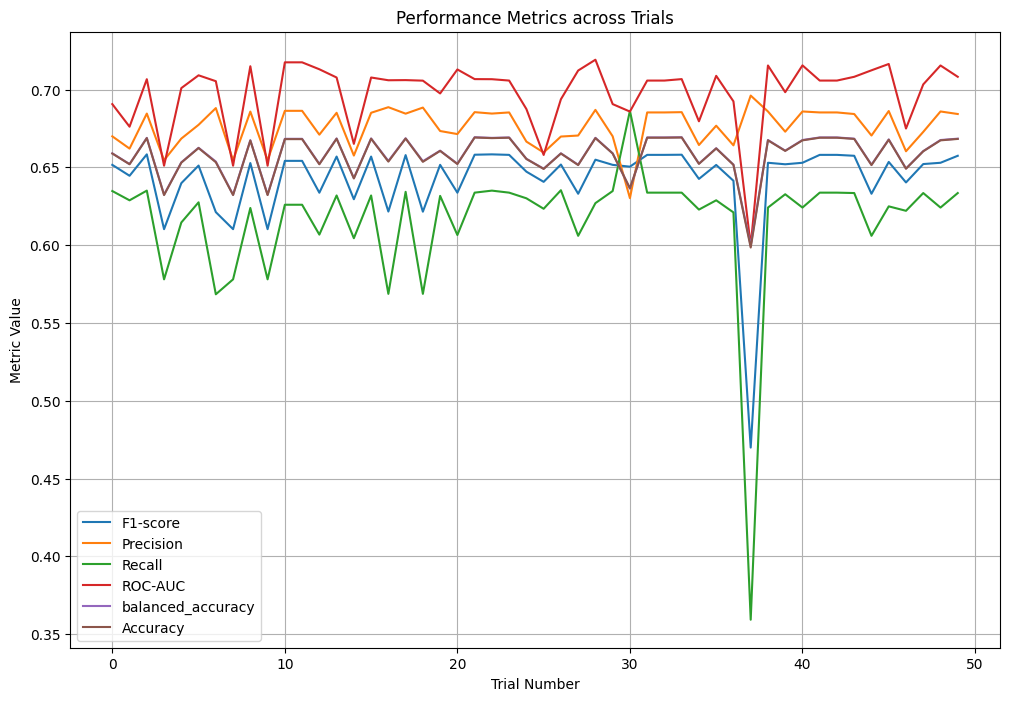

In [ ]:
average_metrics(df_metrics_DT)


graph_metric_score(df_metrics_DT)

,0
F1-score,0.733468
Precision,0.717041
Recall,0.751081
ROC-AUC,0.802475
balanced_accuracy,0.725656
Accuracy,0.725779


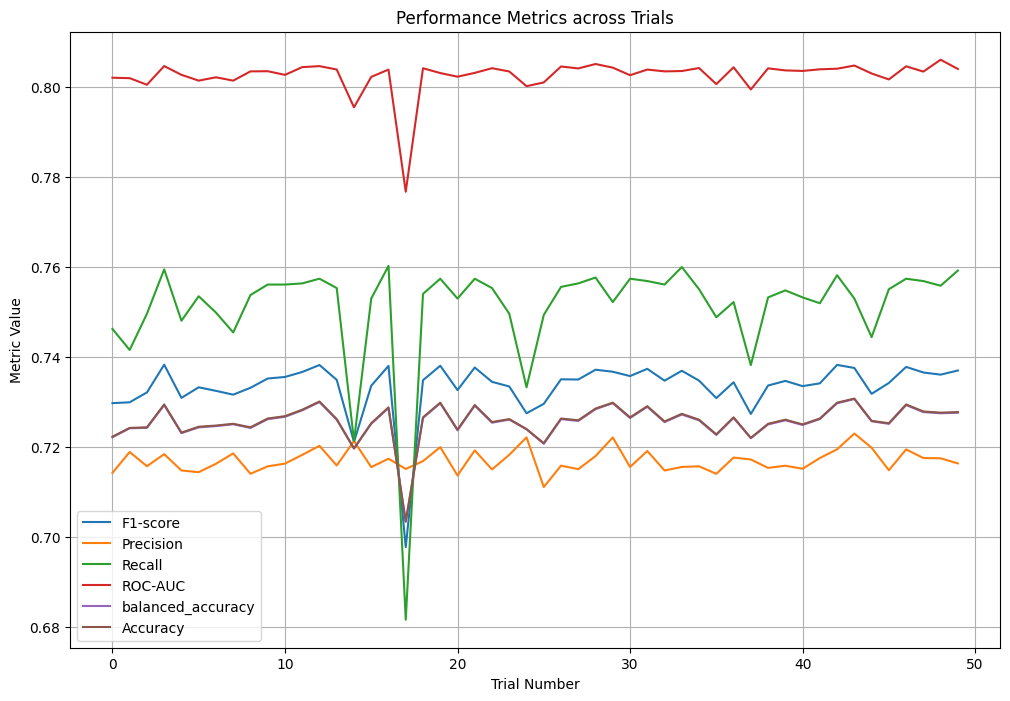

In [ ]:
average_metrics(df_metrics_RF)
graph_metric_score(df_metrics_RF)

,0
F1-score,0.752308
Precision,0.740149
Recall,0.765391
ROC-AUC,0.825156
balanced_accuracy,0.746753
Accuracy,0.746843


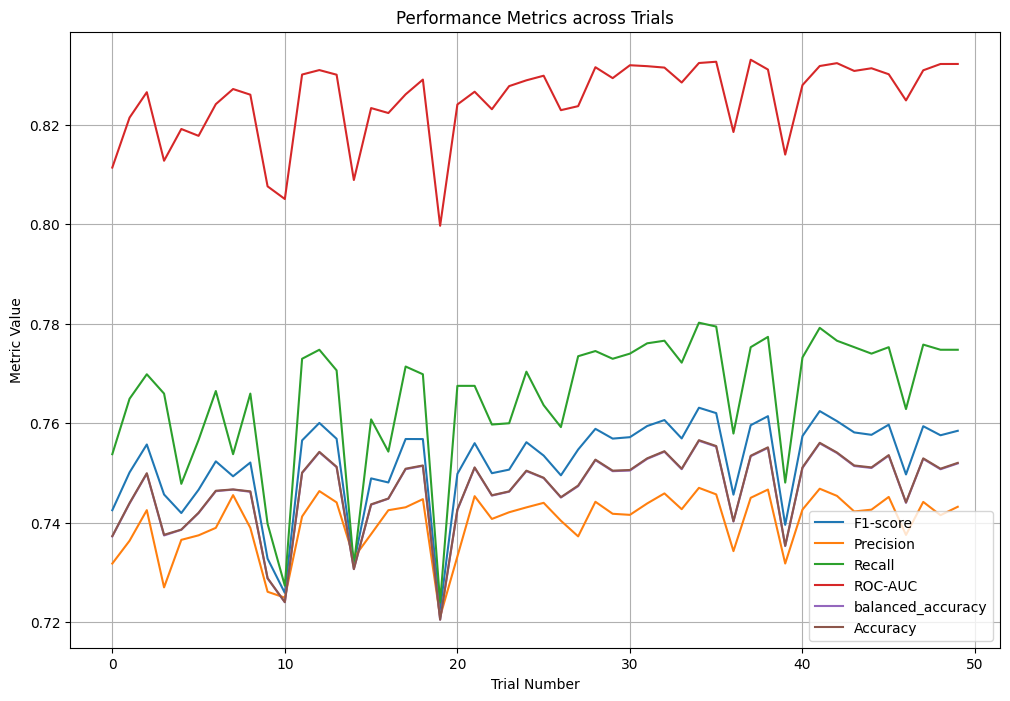

In [ ]:
average_metrics(df_metrics_LGBM)
graph_metric_score(df_metrics_LGBM)

,0
F1-score,0.730503
Precision,0.722378
Recall,0.739091
ROC-AUC,0.801373
balanced_accuracy,0.726004
Accuracy,0.726067


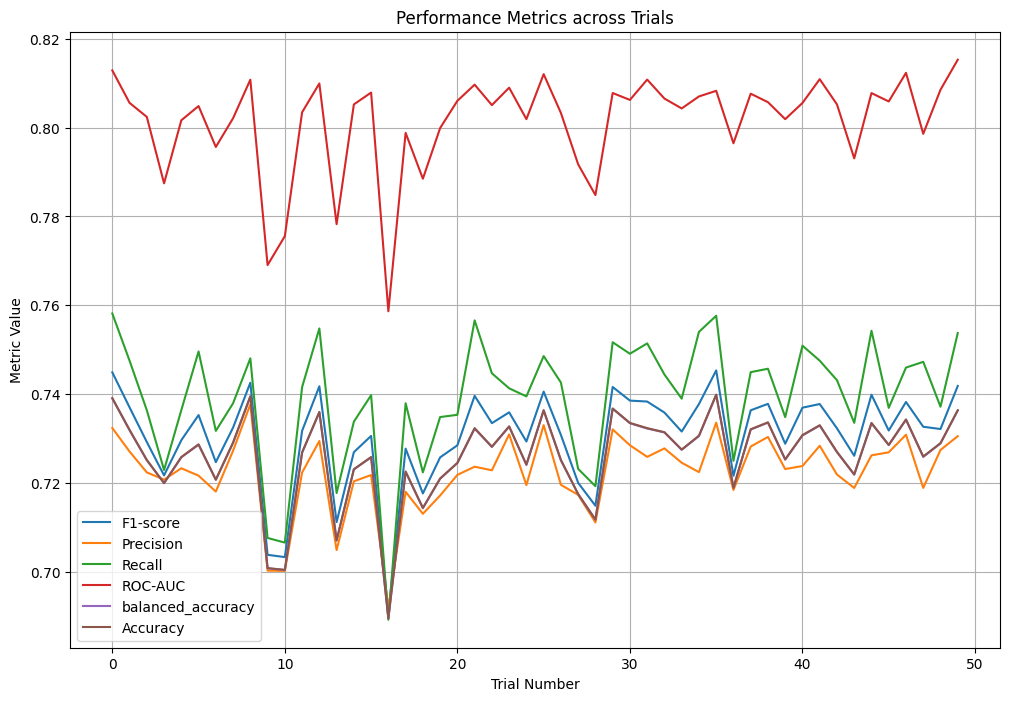

In [ ]:
average_metrics(df_metrics_XGB)
graph_metric_score(df_metrics_XGB)

## Completeness Level Performance